In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

# Import Data

In [2]:
df = pd.read_csv('master.csv')
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,Target,Age,Sex_Female,Weight (kg),Standing Height (cm),BMI,Waist Circumference (cm),Calories,Protein (gm),Carbohydrates (gm),...,Time Lost 10+ lb (3-5),Time Lost 10+ lb (6-10),Time Lost 10+ lb (11+),Time Lost 10+ lb (never),How do you consider your weight (under),How do you consider your weight (normal),Money Spent at Grocery Store,Money Spent at Other Food Store,Money Spent on Eating Out,Money Spent on Takeout/Delivery
0,1.0,62.0,0,94.8,184.5,27.8,101.1,2262.5,104.815,237.465,...,1,0,0,0,0,1,300.0,0.0,125.0,0.0
1,3.0,53.0,0,90.4,171.4,30.8,107.9,3467.5,114.110,290.210,...,0,0,0,1,0,0,200.0,50.0,40.0,0.0
2,1.0,78.0,0,83.4,170.1,28.8,116.5,2205.0,105.140,249.350,...,0,0,0,0,0,1,400.0,0.0,0.0,0.0
3,2.0,56.0,1,109.8,160.9,42.4,110.1,1340.0,70.380,157.990,...,1,0,0,0,0,0,300.0,250.0,50.0,0.0
4,3.0,42.0,1,55.2,164.9,20.3,80.4,853.0,25.295,111.065,...,0,0,0,1,1,0,300.0,0.0,200.0,0.0


# Look at the distribution of the target


3.0    3474
2.0    1042
1.0     750
Name: Target, dtype: int64

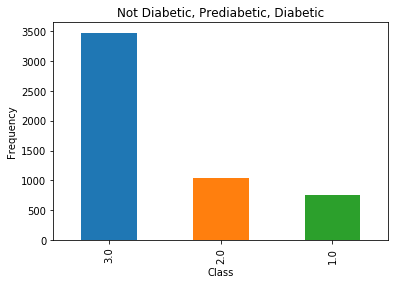

In [3]:
pd.value_counts(df['Target']).plot.bar()
plt.title('Not Diabetic, Prediabetic, Diabetic')
plt.xlabel('Class')
plt.ylabel('Frequency')
df['Target'].value_counts()

# Train Test Split

In [4]:
X = df.iloc[:,1:]
y = df['Target']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (4212, 233)
y_train shape:  (4212,)
X_test shape:  (1054, 233)
y_test shape:  (1054,)


# Because of the imbalances, I'm going to use SMOTE

In [6]:
from imblearn.over_sampling import SMOTE

print("Before SMOTE, counts of label '1': {}".format(sum(y_train==1)))
print("Before SMOTE, counts of label '2': {}".format(sum(y_train==2)))
print("Before SMOTE, counts of label '3': {} \n".format(sum(y_train==3)))

sm = SMOTE(random_state=2)

X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

print('After SMOTE, the shape of X_train: {}'.format(X_train.shape))
print('After SMOTE, the shape of y_train: {} \n'.format(y_train.shape))

print("After SMOTE, counts of label '1': {}".format(sum(y_train==1)))
print("After SMOTE, counts of label '2': {}".format(sum(y_train==2)))
print("After SMOTE, counts of label '3': {}".format(sum(y_train==3)))

Before SMOTE, counts of label '1': 607
Before SMOTE, counts of label '2': 851
Before SMOTE, counts of label '3': 2754 

After SMOTE, the shape of X_train: (8262, 233)
After SMOTE, the shape of y_train: (8262,) 

After SMOTE, counts of label '1': 2754
After SMOTE, counts of label '2': 2754
After SMOTE, counts of label '3': 2754


I will now be training on 8262 rows

<div class="alert alert-block alert-success">
    
# Models

<div class="alert alert-block alert-warning">

# Random Forest Classifier

# Best Performing Model

* No Scaling
* Smote
* Random Forest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(bootstrap = False,
                             criterion =  'entropy',
                             max_depth = None,
                             max_features = 'auto',
                             min_samples_leaf = 2,
                             min_samples_split = 9,
                             n_estimators = 115,
                             random_state = 47) 

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6963946869070209


# Evaluation Metrics

In [8]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print('Accuracy Score:  ' + str(accuracy_score(y_test, y_pred)))
print('F1 Score:        ' + str(f1_score(y_test, y_pred, average="macro")))
print('Precision Score: ' + str(precision_score(y_test, y_pred, average="macro")))
print('Recall Score:    ' + str(recall_score(y_test, y_pred, average="macro")) )
report = classification_report(y_test, y_pred, labels=None,
                               target_names=['Diabetic', 'Prediabetic', 'Healthy'],
                               sample_weight=None, digits=2, output_dict=False)
print ('')
print (report)

Accuracy Score:  0.6963946869070209
F1 Score:        0.45706054732485973
Precision Score: 0.5197105712810922
Recall Score:    0.4520858165491674

              precision    recall  f1-score   support

    Diabetic       0.45      0.31      0.37       143
 Prediabetic       0.37      0.12      0.18       191
     Healthy       0.75      0.93      0.83       720

   micro avg       0.70      0.70      0.70      1054
   macro avg       0.52      0.45      0.46      1054
weighted avg       0.64      0.70      0.65      1054



[Text(0.5,0,'Diabetic'), Text(1.5,0,'Prediabetic'), Text(2.5,0,'Healthy')]

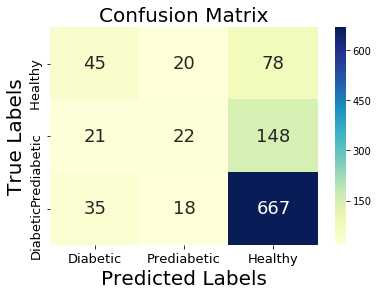

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt     

cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, annot_kws={"size": 18}, fmt="d", cmap="YlGnBu")

ax.set_xlabel('Predicted Labels', fontsize = 20)
ax.set_ylabel('True Labels', fontsize = 20)
ax.set_title('Confusion Matrix', fontsize = 20)
ax.yaxis.set_ticklabels([' Healthy', 'Prediabetic', 'Diabetic'], fontsize = 13)
ax.xaxis.set_ticklabels(['Diabetic', 'Prediabetic', 'Healthy'], fontsize = 13)

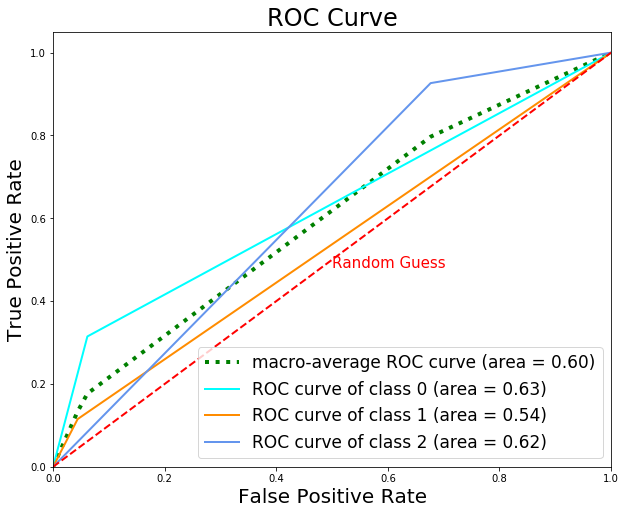

In [10]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

n_classes = 3
### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(y_pred))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(10,8))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red', fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('ROC Curve', fontsize = 24)
plt.legend(loc="lower right", prop={'size': 17})
plt.show()

In [ ]:
from sklearn.tree import export_graphviz

# Create a list of features
features = list(df.columns.values)
features = features[1:]

# Extract single tree
estimator = model.estimators_[114]

# Export as dot file
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = features,
                #class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [13]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = features,
                                   columns=['Importance']).sort_values('Importance', ascending=False)
feature_importances

,Importance
BPQ020_1.0,0.039633
Age,0.036906
MCQ080_1.0,0.034744
BPQ080_1.0,0.033563
BPQ030_1.0,0.029897
How do you consider your weight (normal),0.017536
Waist Circumference (cm),0.016427
DMDHRAGE,0.015677
WHQ150,0.014232
DMDHHSZE_2.0,0.014226


<div class="alert alert-block alert-warning">

# PCA + GradientBoostClassifier

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

exported_pipeline = make_pipeline(  PCA(iterated_power=9,
                                        svd_solver="randomized"),
                                    GradientBoostingClassifier(learning_rate=0.5,
                                                               max_depth=6,
                                                               max_features=0.1,
                                                               min_samples_leaf=1,
                                                               min_samples_split=13,
                                                               n_estimators=100,
                                                               subsample=0.6,
                                                               random_state=47)
                                )

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)
print(metrics.accuracy_score(y_test, results))

In [ ]:
model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.5, loss='deviance', max_depth=6,
               max_features=0.1, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=13,
               min_weight_fraction_leaf=0.0, n_estimators=100,
               n_iter_no_change=None, presort='auto', random_state=47,
               subsample=0.6, tol=0.0001,
               validation_fraction=0.1, verbose=0, warm_start=False)

model.fit(X_train, y_train)
results = model.predict(X_test)
print(metrics.accuracy_score(y_test, results))

<div class="alert alert-block alert-success">

***

# SVM

##### Defaults

In [ ]:
from sklearn.svm import SVC  
svclassifier = SVC()  
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)
svclassifier.score(X_test, y_test)

##### With Pipeline and Gridsearch

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Construct pipeline
pipe_svm = Pipeline([('clf', SVC(random_state=123))])

print (1)
# Set grid search params
param_grid_svm = [
                    {
                     'clf__C': [1, 0.1, 5, 10],
                     'clf__kernel': ['rbf'],
                     'clf__degree': [3, 2, 4],
                     'clf__gamma': ['auto', 0.001, 0.01],
                     'clf__coef0': [0.0],
                     'clf__shrinking': [True],
                     'clf__probability': [False],
                     'clf__tol': [0.001],
                     'clf__verbose': [2],
                     'clf__max_iter': [1],
                     'clf__decision_function_shape': ['ovr'],
                     'clf__random_state': [47]
                     }
                 ]

print (2)
# Construct grid search
model = GridSearchCV(   estimator = pipe_svm,
                        param_grid = param_grid_svm,
                        scoring = 'accuracy',
                        cv = 3,
                        verbose = 2,
                        return_train_score = True
                    )

print(3)
# Fit using grid search
model.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % model.best_score_)

# Best params
print('\nBest params:\n', model.best_params_)

In [14]:
from sklearn.svm import SVC  

model = SVC(       C = 1, 
                   coef0 = 0.0, 
                   decision_function_shape = 'ovr', 
                   degree = 3,
                   gamma = 0.001, 
                   kernel = 'rbf',
                   max_iter = 1, 
                   probability = False, 
                   random_state = 47, 
                   shrinking = True, 
                   tol = 0.001, 
                   verbose = 2
           )  

model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
model.score(X_test, y_test)

[LibSVM]

/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.683111954459203

<div class="alert alert-block alert-success">

***

# XGBoost

##### Defaults

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
training_preds = model.predict(X_train)
val_preds = model.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

##### With Pipeline and Gridsearch

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Construct pipeline
pipe_xg = Pipeline([('clf', xgb.XGBClassifier(random_state = 123))])

# Set grid search params
xgboost_param_grid ={
                        'clf__max_depth' : [3, 5, 6, 7],
                        'clf__learning_rate' : [0.1],
                        'clf__n_estimators' : [5, 30, 80, 100],
                        'clf__silent' : [True],
                        'clf__objective' : ['binary:logistic'],
                        'clf__booster' : ['gbtree'],
                        'clf__n_jobs' : [1],
                        'clf__nthread' : [None],
                        'clf__gamma' : [0],
                        'clf__min_child_weight' : [1, 5, 10],
                        'clf__max_delta_step' : [0],
                        'clf__subsample' : [1, 0.7],
                        'clf__colsample_bytree' : [1],
                        'clf__colsample_bylevel' : [1],
                        'clf__reg_alpha' : [0],
                        'clf__reg_lambda' : [1],
                        'clf__scale_pos_weight' : [1],
                        'clf__base_score' : [0.5],
                        'clf__random_state' : [0],
                        'clf__seed' : [None],
                        'clf__missing' : [None]
                    }

# Construct grid search
model = GridSearchCV(   estimator = pipe_xg,
                        param_grid = xgboost_param_grid,
                        scoring = 'accuracy',
                        cv = 3,
                        verbose = 2,
                        return_train_score = True
                    )

model.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % model.best_score_)

# Best params
print('\nBest params:\n', model.best_params_)

<div class="alert alert-block alert-success">

***

# KNN

##### Defaults

In [17]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
test_preds = model.predict(X_test)
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average = None)))
    print("Recall Score: {}".format(recall_score(labels, preds, average = None)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average = None)))
    
print_metrics(y_test, test_preds)

Precision Score: [0.14705882 0.17582418 0.69503546]
Recall Score: [0.41958042 0.33507853 0.27222222]
Accuracy Score: 0.3036053130929791
F1 Score: [0.21778584 0.23063063 0.39121756]


##### KNN with Pipeline and Gridsearch

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Construct pipeline
pipe_knn = Pipeline([('clf', KNeighborsClassifier())])

# Set grid search params
knn_param_grid = {
                    'clf__n_neighbors' : [5, 3, 4, 6],
                    'clf__weights' : ['uniform', 'distance'],
                    'clf__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                    'clf__leaf_size' : [30, 20, 25, 35, 40],
                    'clf__p' : [2, 1],
                    'clf__metric' : ['minkowski'],
                    'clf__metric_params' : [None],
                    'clf__n_jobs' : [None]
                  }



# Construct grid search
model = GridSearchCV(   estimator=pipe_knn,
                        param_grid=knn_param_grid,
                        scoring='accuracy',
                        cv=3,
                        verbose=1,
                        return_train_score = True)

# Fit using grid search
model.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % model.best_score_)

# Best params
print('\nBest params:\n', model.best_params_)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
